# Display Re-identification Training Results

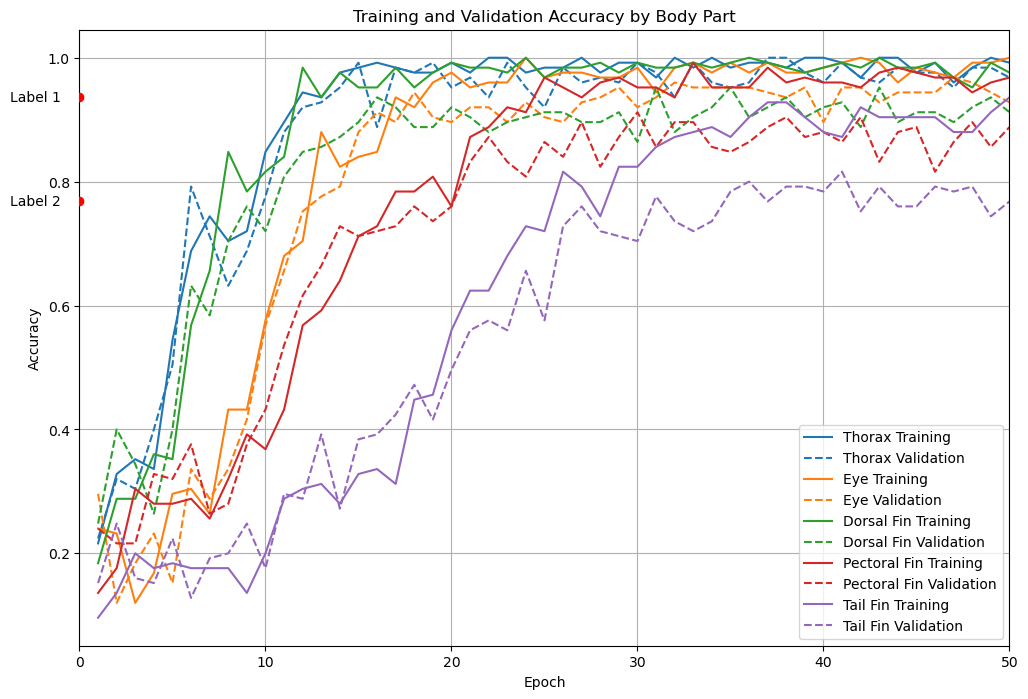

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

paths = {
    "Thorax": "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/results/IDUN/featuremodel_2024-05-03_13-13-25/metrics.csv",
    "Eye": "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/results/IDUN/featuremodel_2024-05-03_13-38-49/metrics.csv",
    "Dorsal Fin": "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/results/IDUN/featuremodel_2024-05-03_13-45-11/metrics.csv",
    "Pectoral Fin": "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/results/IDUN/featuremodel_2024-05-03_14-05-09/metrics.csv",
    "Tail Fin": "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/results/IDUN/featuremodel_2024-05-03_14-15-06/metrics.csv"
}

dfs = {body_part: pd.read_csv(path) for body_part, path in paths.items()}

plt.figure(figsize=(12, 8))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, (body_part, df) in enumerate(dfs.items()):
    epochs = range(1, len(df['training_acc']) + 1)
    color = colors[i % len(colors)]
    plt.plot(epochs, df['training_acc'], label=f'{body_part} Training', linestyle='-', color=color)
    plt.plot(epochs, df['validation_acc'], label=f'{body_part} Validation', linestyle='--', color=color)

plt.title('Training and Validation Accuracy by Body Part')
plt.xlabel('Epoch')
plt.xlim(0,50)
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Display Detection Training Results

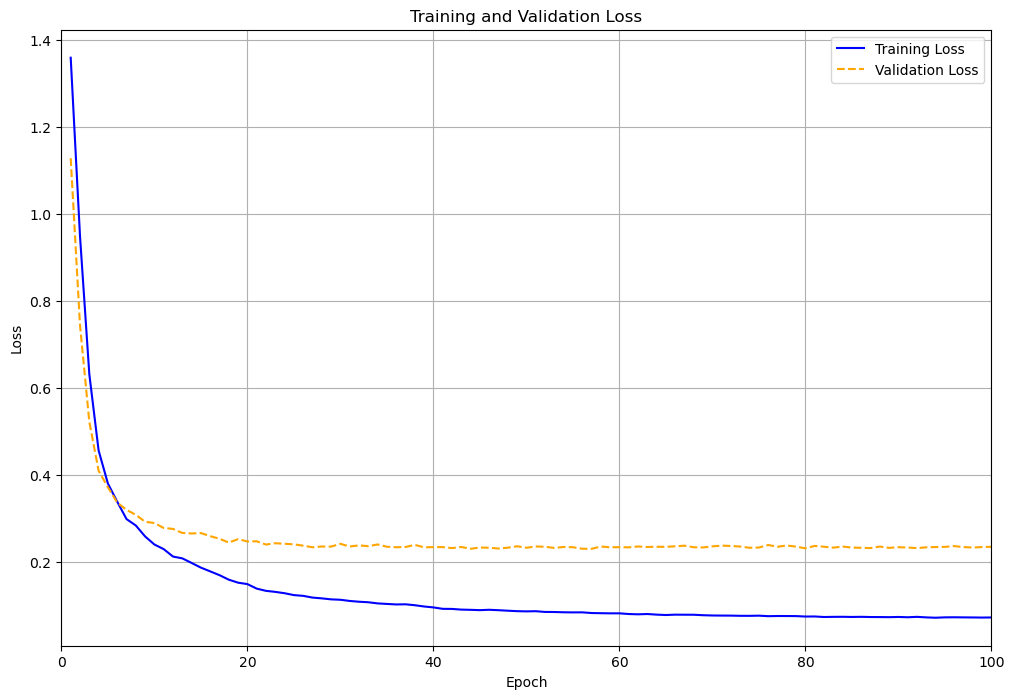

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
path = "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/results/IDUN/bodypartdetection/metrics.csv"
data = pd.read_csv(path)

# Plotting
plt.figure(figsize=(12, 8))

epochs = range(1, len(data) + 1)  # Assuming epoch starts from 1
plt.plot(epochs, data['training_loss'], label='Training Loss', linestyle='-', color='blue')
plt.plot(epochs, data['validation_loss'], label='Validation Loss', linestyle='--', color='orange')

plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.xlim(0, len(data))
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# Generate bar plot for pipeline accuracies

[Text(0, 0, 'Thorax'),
 Text(1, 0, 'Dorsal fin'),
 Text(2, 0, 'Eye'),
 Text(3, 0, 'Pectoral fin'),
 Text(4, 0, 'Caudal fin')]

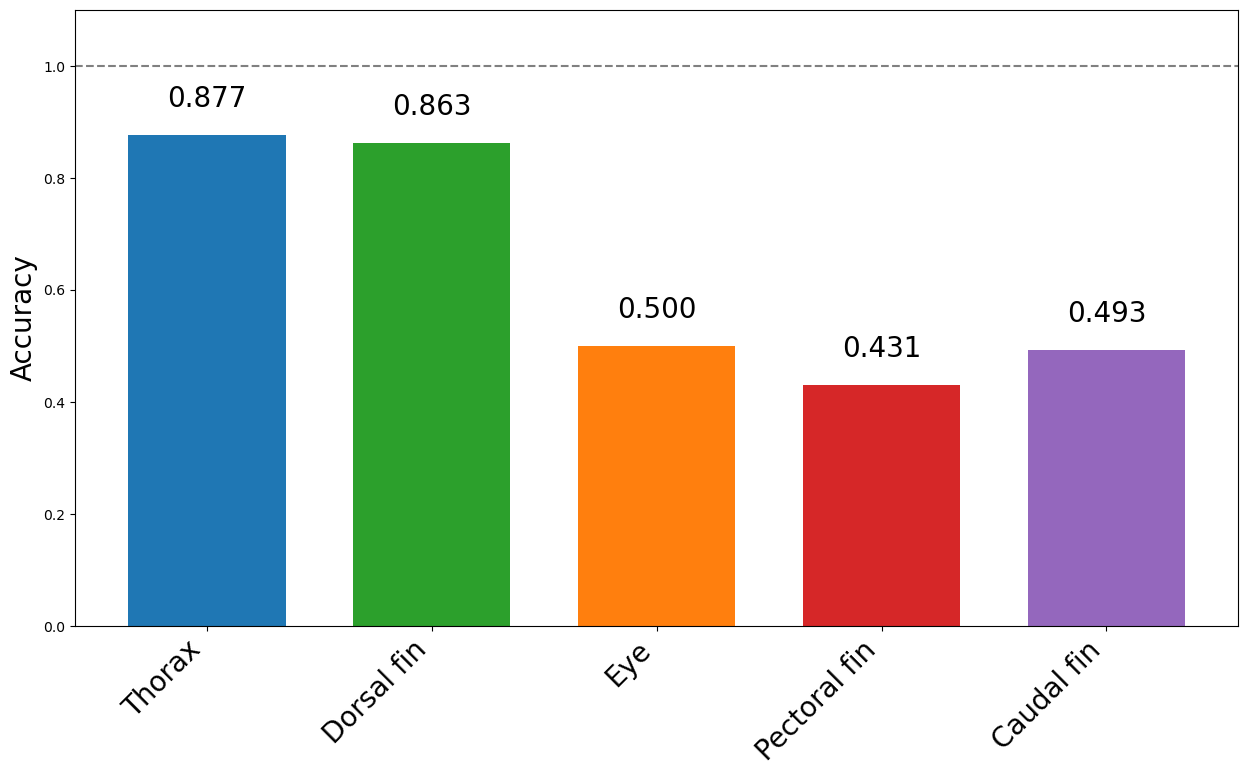

In [1]:
import matplotlib.pyplot as plt
import numpy as np

bodyparts = ['Thorax', 'Dorsal fin', 'Eye', 'Pectoral fin', 'Caudal fin']
accuracies = [0.877, 0.863, 0.5, 0.431, 0.493]

fig, ax = plt.subplots(figsize=(15,8))

width = 0.7
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Rearange colors so that the coloring of body parts is consistent through the whole report.
colors2 = colors[2]
colors3 = colors[1]
colors[1] = colors2
colors[2] = colors3
    
x = np.arange(len(bodyparts))
ax.bar(x, accuracies, width, color=colors)
for i,acc in enumerate(accuracies): ax.text(i, acc + 0.05, f'{acc:.3f}', ha='center', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
ax.set_ylim(0, 1.1)
ax.axhline(y=1, color='gray', linestyle='--')
ax.set_xticks(np.arange(len(bodyparts)))
ax.set_xticklabels(bodyparts, rotation=45, ha='right', fontsize = 20)

# Generere confusion matrix for pipeline test resultater

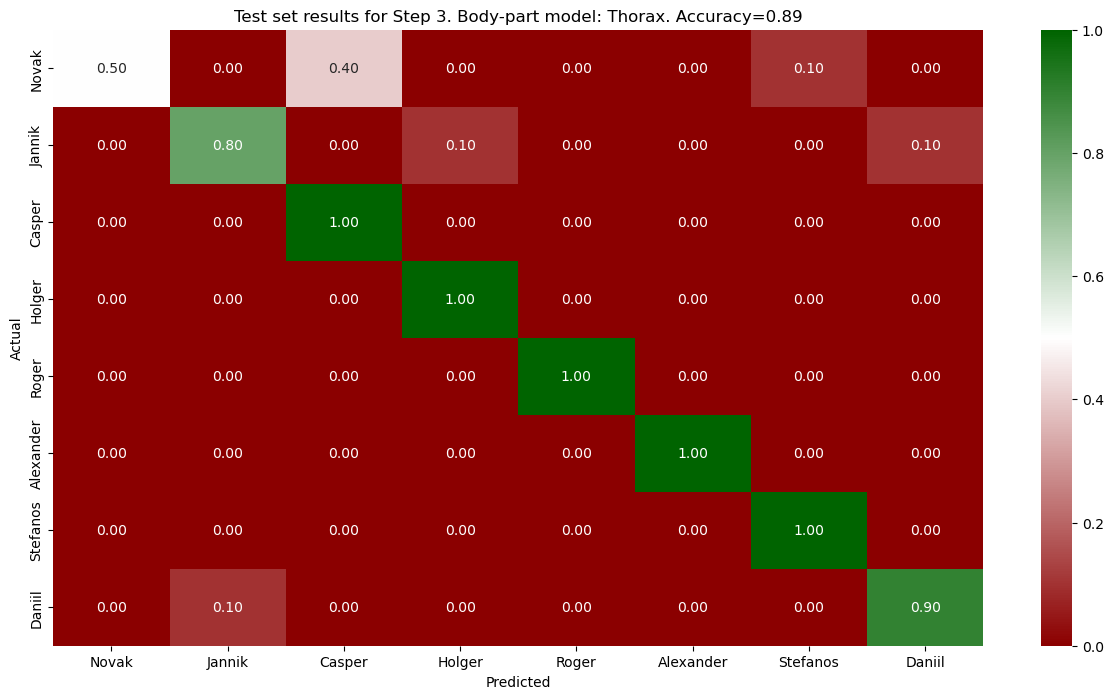

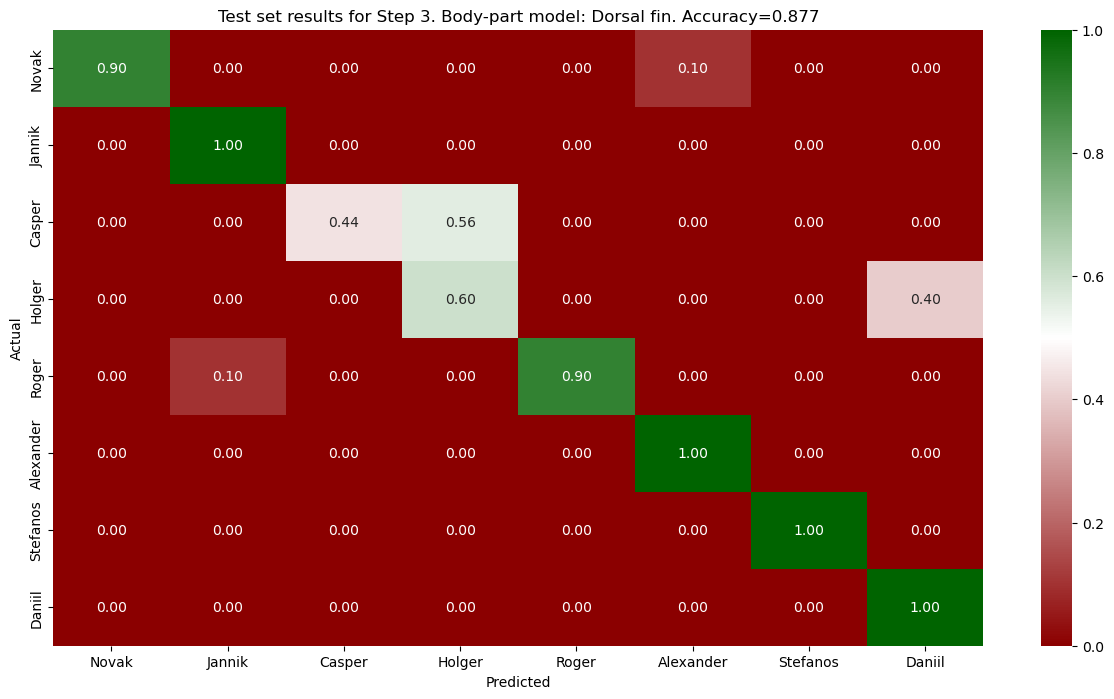

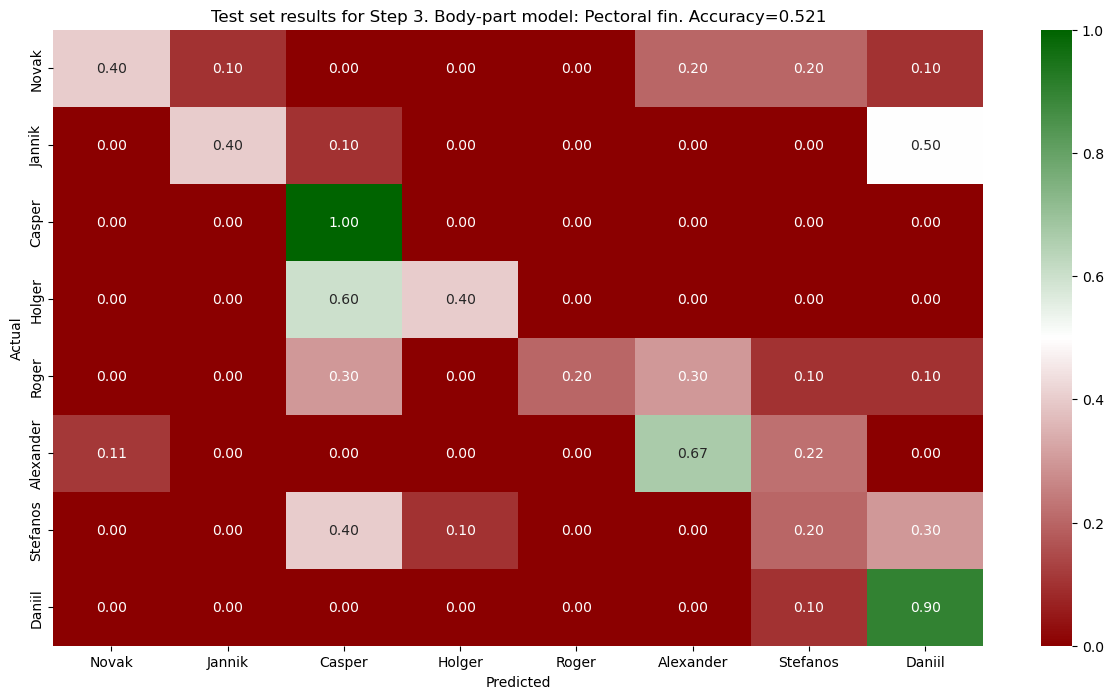

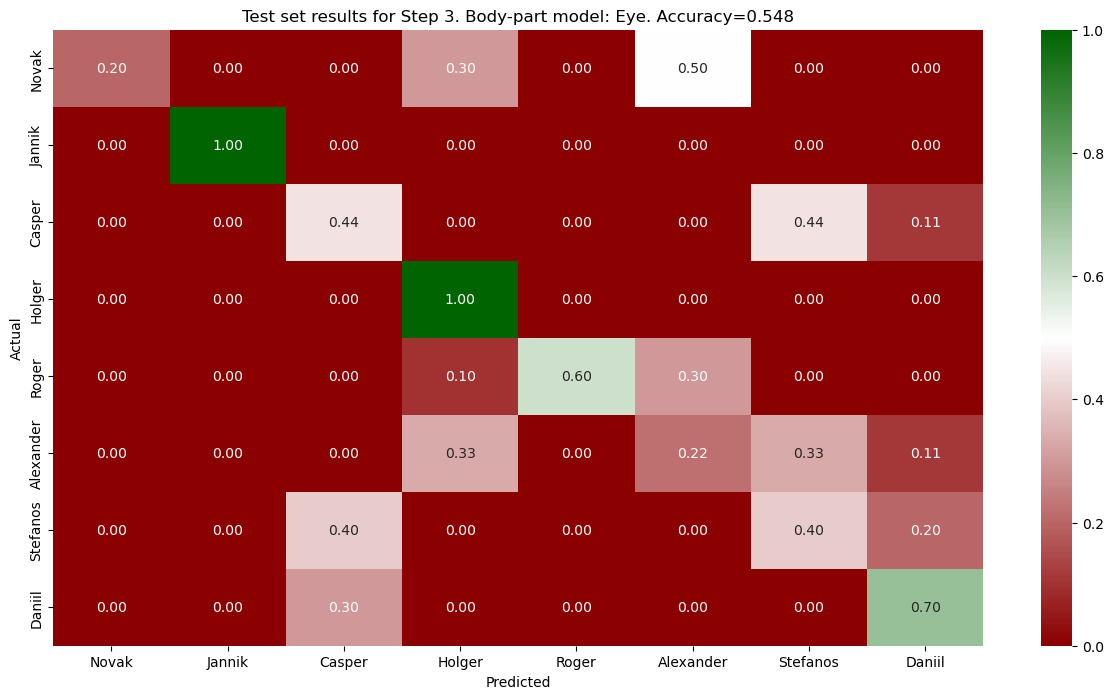

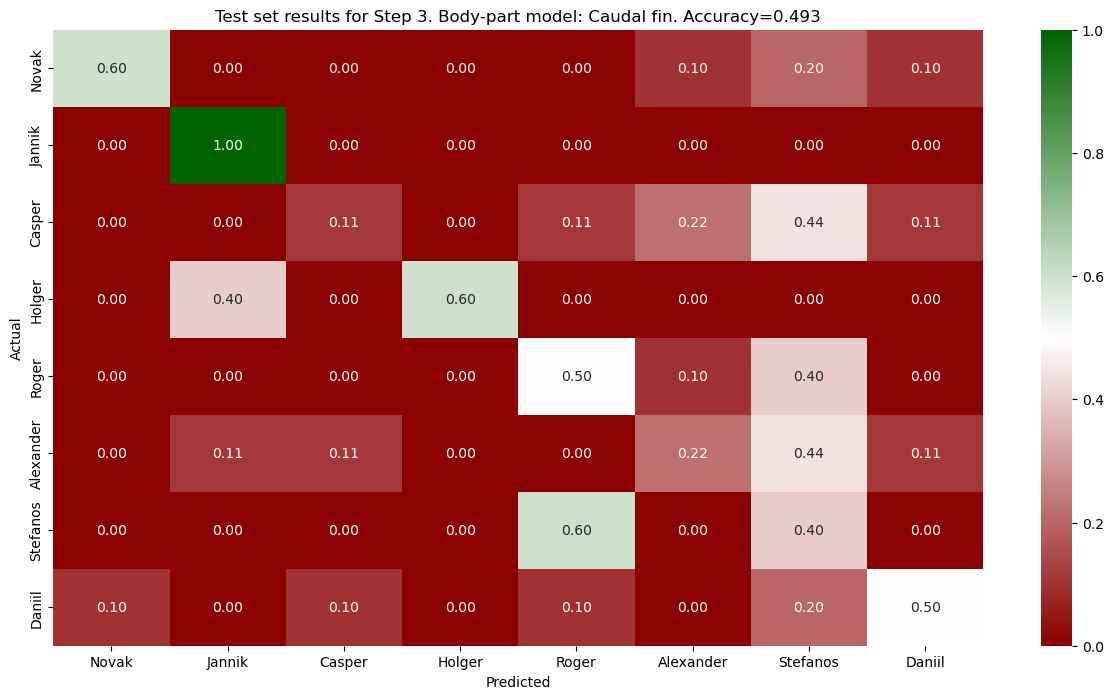

In [33]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["darkred", "w", "darkgreen"], N=256) 

# This code generates confusion matrices for each body part re-identification model.

path3 = "/Users/magnuswiik/Documents/NTNU/5.klasse/Masteroppgave/masterthesis/predictions_targets_step3_test.json"
with open(path3, 'r') as file:
    results = json.load(file)
    
preds = results['predictions']
targets = results['targets']
names = {3:'Novak', 5:'Jannik', 7:'Casper', 9:'Holger', 10:'Roger', 17:'Alexander', 19:'Stefanos', 20:'Daniil'}
target_names = ['Novak', 'Jannik', 'Casper', 'Holger', 'Roger', 'Alexander', 'Stefanos', 'Daniil']

bodyparts_step3 = ['Thorax', 'Dorsal fin', 'Pectoral fin', 'Eye', 'Caudal fin']
bodyparts = bodyparts_step3

for i in range(len(bodyparts)):
    y_pred = preds[i]
    y_true = targets[i]
    y_pred = [names[pred] for pred in y_pred]
    y_true = [names[true] for true in y_true]
    
    cm = confusion_matrix(y_true, y_pred)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    accuracy = np.trace(cm) / np.sum(cm)
    fig, ax = plt.subplots(figsize=(15,8))
    sns.heatmap(cmn, cmap=cmap, annot=True, fmt='.2f', xticklabels=target_names, yticklabels=target_names)#, xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Test set results for Step 3. Body-part model: {bodyparts[i]}. Accuracy={round(accuracy, 3)}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show(block=False)
